In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv(r'C:\Users\Vaibhav Rakhude\Desktop\Data Science Assignments\Simple Linear Regression\Salary_Data.csv')

In [28]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [29]:
# Our problem states that we need to predict the salary hike based on years of experience. 
# Therefore Salary is our target column and YearsExperience is our independent column.

In [30]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
# Since the mean value is almost equal to median, we can say neglegible amount of skewness is present.

# Let us check the skewness using distance plot.

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

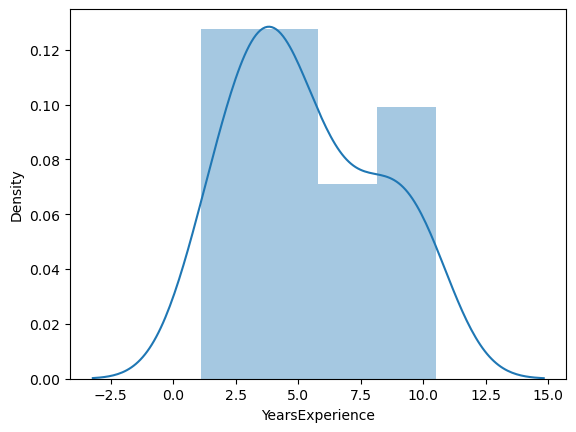

In [31]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

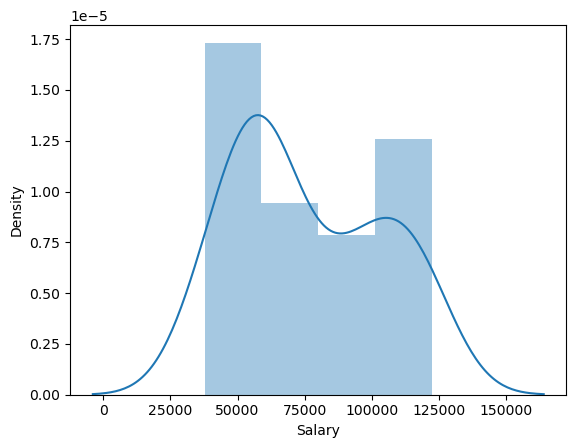

In [32]:
sns.distplot(df['Salary'])

In [33]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [74]:
# Here as you can observe, Skewness is less than o.5
# Therefore we can neglect this much amount of skewness

# Correlation between Target and Independent column. 

In [35]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
# There should always be strong relationship between target and independent column. 
# In our case we have 97% coorelation values which is pretty acceptable

<AxesSubplot:>

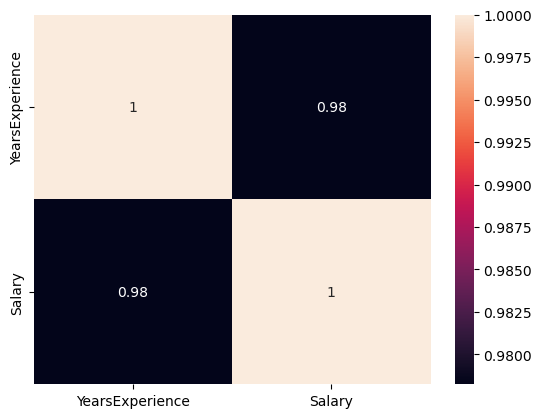

In [36]:
sns.heatmap(df.corr(), annot=True)

# Model Building.

In [37]:
import statsmodels.formula.api as smf 

In [38]:
model = smf.ols('Salary~YearsExperience', data=df).fit() 

# Model Accuracy 

In [39]:
model.rsquared

0.9569566641435086

In [40]:
# Our model is able to give us 95% accuracy, which is considered pretty acceptable according to industry standards. 

In [41]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [42]:
# With the help of slope and Intercept value, we can predict different values 

In [43]:
x = 7.5

y = 9449.962321*x +  25792.200199

In [44]:
y

96666.9176065

In [45]:
# Now let us compute p as well as t values. 

In [51]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [52]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

# Prediction of new values

In [53]:
# With the help of above model we can predict new values and lets see the prediction our model gives.
# Therefore let us take a new independent dataset randomly and let it predict target column. 

In [60]:
newdf = pd.DataFrame ({'YearsExperience' : [11, 11.7, 12, 12.5, 13.2 ]})

In [61]:
newdf

,YearsExperience
0,11.0
1,11.7
2,12.0
3,12.5
4,13.2


In [62]:
model.predict(newdf)

0    129741.785735
1    136356.759360
2    139191.748056
3    143916.729217
4    150531.702842
dtype: float64

In [66]:
# Here our model has successfully predicted 'salary hike' based on YearsExperience. 